In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

(train_X, train_y), (test_X, test_y) = mnist.load_data()

train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

train_X = train_X.astype('float32') / 255
test_X = test_X.astype('float32') / 255
print('train_X shape:', train_X.shape)
print('test_X shape:', test_X.shape)

model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(28, 28, 1),
                padding='same', use_bias=True, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(64, (3,3), activation='relu', use_bias=True, 
                padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam", 
              metrics=['accuracy'])

train_X shape: (60000, 28, 28, 1)
test_X shape: (10000, 28, 28, 1)


In [2]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 64)          0

In [3]:
hist = model.fit(train_X, train_y,
                 validation_data=(test_X, test_y),
                 batch_size=500, epochs=10)

score = model.evaluate(test_X, test_y, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
120/120 [==============================] - 35s 289ms/step - loss: 0.5669 - accuracy: 0.8230 - val_loss: 0.1150 - val_accuracy: 0.9647
Epoch 2/10
120/120 [==============================] - 34s 279ms/step - loss: 0.1629 - accuracy: 0.9512 - val_loss: 0.0669 - val_accuracy: 0.9798
Epoch 3/10
120/120 [==============================] - 34s 279ms/step - loss: 0.1191 - accuracy: 0.9646 - val_loss: 0.0517 - val_accuracy: 0.9821
Epoch 4/10
120/120 [==============================] - 33s 277ms/step - loss: 0.0945 - accuracy: 0.9724 - val_loss: 0.0402 - val_accuracy: 0.9867
Epoch 5/10
120/120 [==============================] - 33s 276ms/step - loss: 0.0799 - accuracy: 0.9759 - val_loss: 0.0378 - val_accuracy: 0.9874
Epoch 6/10
120/120 [==============================] - 33s 277ms/step - loss: 0.0717 - accuracy: 0.9780 - val_loss: 0.0345 - val_accuracy: 0.9890
Epoch 7/10
120/120 [==============================] - 33s 276ms/step - loss: 0.0663 - accuracy: 0.9803 - val_loss: 0.0316 - val_ac

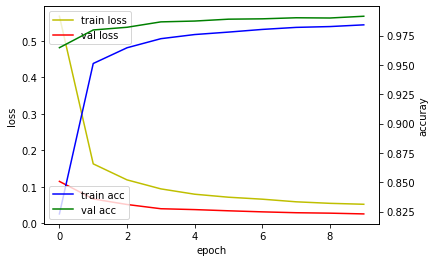

In [5]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'],'g',label='val acc')
acc_ax.set_ylabel('accuray')
acc_ax.legend(loc='lower left')

plt.show()

In [6]:
model_json = model.to_json()

In [7]:
from tensorflow.keras.models import model_from_json
model2 = model_from_json(model_json)

In [8]:
model2.compile(loss=tf.keras.losses.categorical_crossentropy,
               optimizer=tf.keras.optimizers.Adam(), 
               metrics=['accuracy'])

hist = model.fit(train_X, train_y,
                 validation_data=(test_X, test_y),
                 batch_size=10000, epochs=10)

score = model2.evaluate(test_X, test_y, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
6/6 [==============================] - 37s 6s/step - loss: 0.0450 - accuracy: 0.9863 - val_loss: 0.0255 - val_accuracy: 0.9920
Epoch 2/10
6/6 [==============================] - 34s 6s/step - loss: 0.0434 - accuracy: 0.9871 - val_loss: 0.0254 - val_accuracy: 0.9915
Epoch 3/10
6/6 [==============================] - 33s 6s/step - loss: 0.0450 - accuracy: 0.9866 - val_loss: 0.0254 - val_accuracy: 0.9914
Epoch 4/10
6/6 [==============================] - 34s 6s/step - loss: 0.0427 - accuracy: 0.9870 - val_loss: 0.0246 - val_accuracy: 0.9921
Epoch 5/10
6/6 [==============================] - 34s 6s/step - loss: 0.0413 - accuracy: 0.9874 - val_loss: 0.0242 - val_accuracy: 0.9922
Epoch 6/10
6/6 [==============================] - 34s 6s/step - loss: 0.0398 - accuracy: 0.9880 - val_loss: 0.0242 - val_accuracy: 0.9922
Epoch 7/10
6/6 [==============================] - 34s 6s/step - loss: 0.0405 - accuracy: 0.9879 - val_loss: 0.0239 - val_accuracy: 0.9925
Epoch 8/10
6/6 [==================

ValueError: in user code:

    File "C:\Users\r2com\anaconda3\lib\site-packages\keras\engine\training.py", line 1366, in test_function  *
        return step_function(self, iterator)
    File "C:\Users\r2com\anaconda3\lib\site-packages\keras\engine\training.py", line 1356, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\r2com\anaconda3\lib\site-packages\keras\engine\training.py", line 1349, in run_step  **
        outputs = model.test_step(data)
    File "C:\Users\r2com\anaconda3\lib\site-packages\keras\engine\training.py", line 1305, in test_step
        self.compiled_loss(
    File "C:\Users\r2com\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\r2com\anaconda3\lib\site-packages\keras\losses.py", line 141, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\r2com\anaconda3\lib\site-packages\keras\losses.py", line 245, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\r2com\anaconda3\lib\site-packages\keras\losses.py", line 1664, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\r2com\anaconda3\lib\site-packages\keras\backend.py", line 4994, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 10) are incompatible


In [ ]:
# import tensorflow as tf
# from tensorflow.keras.datasets import mnist
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, Flatten
# from tensorflow.keras.layers import Conv2D, MaxPooling2D

# (train_X, train_y), (test_X, test_y) = mnist.load_data()

# train_X = train_X.reshape(train_X.shape[0], 28, 28, 1)
# test_X = test_X.reshape(test_X.shape[0], 28, 28, 1)

# train_X = train_X.astype('float32')
# test_X = test_X.astype('float32')
# train_X /= 255 
# test_X /= 255 
# print('train_X shape:', train_X.shape)
# print(train_X.shape[0], 'train samples')
# print(test_X.shape[0], 'test samples')

# train_y = tf.keras.utils.to_categorical(train_y, 10)
# test_y = tf.keras.utils.to_categorical(test_y, 10)

# model = Sequential()
# model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), 
#                  activation='relu',))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.1))

# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(10, activation='softmax'))

# model.compile(loss=tf.keras.losses.categorical_crossentropy,
#               optimizer=tf.keras.optimizers.Adam(), 
#               metrics=['accuracy'])

# hist = model.fit(train_X, train_y,
#                  validation_data=(test_X, test_y),
#                  batch_size=10000, epochs=10)

# score = model.evaluate(test_X, test_y, verbose=0)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1])

In [ ]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'],'g',label='val acc')
acc_ax.set_ylabel('accuray')
acc_ax.legend(loc='lower left')

plt.show()